In [12]:
!wget -O box.png https://i.stack.imgur.com/vdq6c.png
!wget -O box_in_scene.png https://i.stack.imgur.com/s6GUH.png

--2021-03-17 09:56:31--  https://i.stack.imgur.com/vdq6c.png
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.36.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.36.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50728 (50K) [image/png]
Saving to: ‘box.png’

box.png             100%[===================>]  49.54K  --.-KB/s    in 0.004s  

2021-03-17 09:56:31 (13.6 MB/s) - ‘box.png’ saved [50728/50728]

--2021-03-17 09:56:31--  https://i.stack.imgur.com/s6GUH.png
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.36.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.36.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122490 (120K) [image/png]
Saving to: ‘box_in_scene.png’

box_in_scene.png    100%[===================>] 119.62K  --.-KB/s    in 0.009s  

2021-03-17 09:56:31 (12.5 MB/s) - ‘box_in_scene.png’ saved [122490/122490]



# New Section

In [1]:
!pip3 uninstall -y opencv-contrib-python 
!pip3 uninstall -y opencv-python

!pip3 install opencv-contrib-python
!pip3 install opencv-python

Uninstalling opencv-contrib-python-4.5.1.48:
  Successfully uninstalled opencv-contrib-python-4.5.1.48
Uninstalling opencv-python-4.5.1.48:
  Successfully uninstalled opencv-python-4.5.1.48
  Using cached https://files.pythonhosted.org/packages/17/69/cc755e763f4bb20cb25c7696172e6bb556719faf458c5362f4e54d6cd765/opencv_contrib_python-4.5.1.48-cp37-cp37m-manylinux2014_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/0f/13/192104516c4a3d92dc6b5e106ffcfbf0fe35f3c4faa49650205ff652af72/opencv_python-4.5.1.48-cp37-cp37m-manylinux2014_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
box = cv.imread('box.png',cv.IMREAD_GRAYSCALE)
scene = cv.imread('box_in_scene.png',cv.IMREAD_GRAYSCALE)

In [4]:
detector = cv.FastFeatureDetector_create()

In [5]:
sift = cv.SIFT_create()

kp1 = detector.detect(box, None)
kp1, des1 = sift.compute(box, kp1)

kp2 = detector.detect(scene, None)
kp2, des2 = sift.compute(scene, kp2)

In [6]:
matches = []
for i, k1 in enumerate(des1):
  for j, k2 in enumerate(des2):
    matches.append(
        cv.DMatch(_distance=np.linalg.norm(k1-k2),
                  _imgIdx=0,
                  _queryIdx=i,
                  _trainIdx=j))

In [7]:
matches = sorted(matches, key = lambda x : x.distance)
img3 = cv.drawMatches(box, kp1, scene, kp2, matches[:20], None, flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

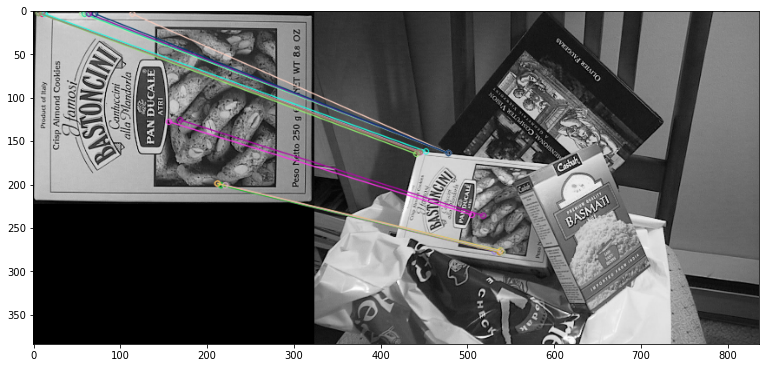

In [8]:
plt.figure(figsize = (13,15))
plt.imshow(img3)
plt.show()